# Introducción a la Inferencia Causal
# Ejercicios Prácticos Clase 1

## Librerías necesarias

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
import statsmodels.api as sm 

## Ejercicio 1

_Parte A: datos observacionales_

1.   Importar el conjunto de datos **c1_ejercicio1_obs.csv**. Es un conjunto de datos simulado, similar a la simulación de clase. Pero en este caso, no se conoce el proceso generador de esos datos. Incluye las siguientes variables:


* $fumar$: si la persona es fumadora o no
* $edad$: la edad de la persona
* $deporte$: un indicador de cuánto deporte hace la persona
* $vida$: la esperanza de vida de la persona


In [ ]:
url = "https://storage.googleapis.com/humai-datasets/causalidad/c1_ejercicio1_obs.csv"
df_obs = pd.read_csv(url)
df_obs.head()

,edad,deporte,fumar,vida
0,33.296084,53.377052,1,60.051199
1,21.454035,96.396169,1,79.750218
2,32.427141,22.568568,1,53.891703
3,32.944013,98.231489,1,65.099325
4,46.623415,9.698961,1,38.257223


2.   Graficar las distribuciones de las variables y las relaciones entre ellas.

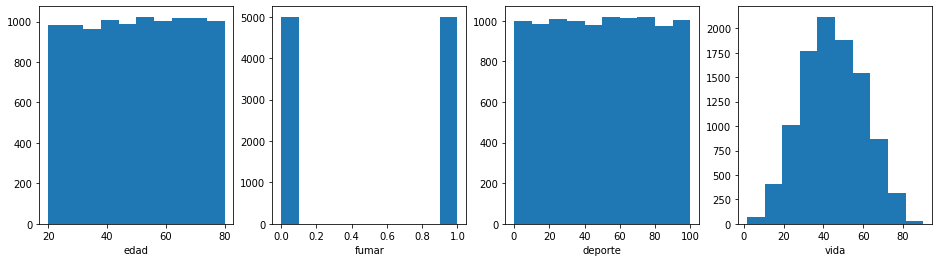

In [ ]:
fig , axes = plt.subplots(1,4)
fig.set_size_inches([16,4])

axes[0].hist(df_obs.edad); axes[1].hist(df_obs.fumar); axes[2].hist(df_obs.deporte); axes[3].hist(df_obs.vida) 
axes[0].set_xlabel('edad'); axes[1].set_xlabel('fumar'); axes[2].set_xlabel('deporte'); axes[3].set_xlabel('vida')

plt.show()

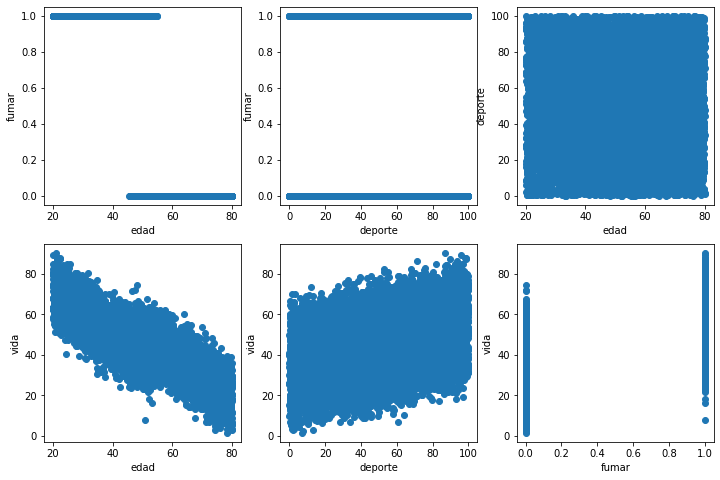

In [ ]:
# Muchas formas de graficar las relaciones entre variables, esta es solo una posibilidad:

fig , axes = plt.subplots(2,3)
fig.set_size_inches([12,8])

axes[0,0].scatter(df_obs.edad, df_obs.fumar); axes[0,1].scatter(df_obs.deporte, df_obs.fumar); axes[0,2].scatter(df_obs.edad, df_obs.deporte)
axes[1,0].scatter(df_obs.edad, df_obs.vida); axes[1,1].scatter(df_obs.deporte, df_obs.vida); axes[1,2].scatter(df_obs.fumar, df_obs.vida)

axes[0,0].set_xlabel('edad');  axes[0,1].set_xlabel('deporte'); axes[0,2].set_xlabel('edad')
axes[0,0].set_ylabel('fumar'); axes[0,1].set_ylabel('fumar');   axes[0,2].set_ylabel('deporte')

axes[1,0].set_xlabel('edad'); axes[1,1].set_xlabel('deporte'); axes[1,2].set_xlabel('fumar')
axes[1,0].set_ylabel('vida'); axes[1,1].set_ylabel('vida');    axes[1,2].set_ylabel('vida')

plt.show()


3.  Se quiere estimar el efecto de fumar sobre la esperanza de vida, usando una regresión lineal. ¿Qué variables habría que incluir y por qué? ¿Incluir esas variables asegura que estaremos identificando correctamente el efecto causal? ¿Qué supuestos deben cumplirse para identificarlo?


> Respuesta
>
> En principio querríamos incluir la variable $edad$ dado que está correlacionada con el tratamiento y el resultado. En esta población parecen fumar más los jóvenes, y si la omitimos confundiríamos el efecto de la edad en la salud con el de fumar. 
>
> Siempre son necesarios supuestos teóricos para poder afirmar que determinado modelo estimado tiene una interpretación causal. Incluir la variable $edad$ **no** asegura que estamos identificando correctamente el efecto causal. Como no conocemos el real proceso generador de datos, no sabemos si estamos omitiendo algún confusor del cual no tenemos datos. Por ejemplo, bien se podría argumentar que los fumadores suelen ser personas que tienen otros malos hábitos, y que esos malos hábitos son los responsables de una peor esperanza de vida. En ese caso, al no incluir variables que capturen los malos hábitos en la regresión, atribuiríamos erradamente al hecho de fumar los efectos de esos hábitos sobre la esperanza de vida.
>
> Para estar identificando correctamente el efecto causal debemos suponer que se cumple el supuesto de independencia (sin tratamiento, la esperanza de vida de fumadores y no fumadores sería la misma). Ese supuesto se cumple si controlamos por todas las variables confusoras relevantes. 



4.  Estimar los siguientes 3 modelos:
  
  (a) $vida_i = \alpha_0 + \alpha_1 \; fumar_i + \alpha_2 \; edad_i + \alpha_3 \; deporte_i + \mu_i $

  (b) $vida_i = \beta_0 + \beta_1  \; fumar_i + \beta_3 \; deporte_i$

  (c) $vida_i = \gamma_0 + \gamma_1 \; fumar_i + \gamma_2 \; edad_i$

   4.1. Comparar $ \hat{\alpha_1} $, $ \hat{\beta_1} $ y $ \hat{\gamma_1} $.

   4.2 Si suponemos que (a) es un modelo que permite identificar correctamente el efecto causal en la salud, ¿(b) o (c) permiten hacerlo? ¿Cuáles son las variables confusoras?



In [ ]:
y = df_obs["vida"]

# modelo A
Xa = df_obs[["fumar", "edad", "deporte"]]
rega = LinearRegression().fit(Xa, y)


# modelo A
Xb = df_obs[["fumar", "deporte"]]
regb = LinearRegression().fit(Xb, y)



# modelo A
Xc = df_obs[["fumar", "edad"]]
regc = LinearRegression().fit(Xc, y)


# ver los coeficientes estimados
print([rega.coef_[0], regb.coef_[0], regc.coef_[0]])

[-10.009989888055154, 19.790431316776584, -9.763244744130462]




> Respuesta
>
> Si (a) identifica correctamente el efecto causal, (b) no lo hace y (c) sí. La variable confusora es $edad$, pues está correlacionada con $vida$ y con el tratamiento $fumar$. Por eso, al omitirla en el modelo (b), aparece un sesgo. En cambio, $deporte$ no lo es porque no correlaciona con el tratamiento, y por eso el modelo (c) puede identificar el efecto de tratamiento aunque omitamos dicha variable.




_Parte B: datos experimentales_

5.  Importar el conjunto de datos **c1_ejercicio1_exp.csv**. Es un conjunto de datos similar al anterior, pero luego de realizar un experimento donde se asignó aleatoriamente a qué personas les tocaría ser fumadoras ($fumar\_exp$) y luego se registró la esperanza de vida para esas personas ($vida\_exp$).

In [ ]:
url = "https://storage.googleapis.com/humai-datasets/causalidad/c1_ejercicio1_exp.csv"
df_exp = pd.read_csv(url)
df_exp.head()

,edad,deporte,fumar_exp,vida_exp
0,50.950863,56.733536,0,51.366213
1,66.150751,91.508939,0,41.460137
2,77.241565,17.434605,0,12.575384
3,20.581494,62.284763,1,68.454326
4,34.189574,9.641916,0,60.410305



6. Compare los promedios de $deporte$ y $edad$ para fumadores y no fumadores en los datos experimentales. ¿Qué observa?

In [ ]:
df_exp.groupby("fumar_exp").agg({"deporte": [np.mean, np.std],
                                 "edad": [np.mean, np.std]})

deporte                  edad           
                mean        std       mean        std
fumar_exp                                            
0          49.538973  28.791939  49.688996  17.439932
1          50.112594  28.638048  50.117758  17.396778



> Hay balanceo de características: los grupos de tratamiento y control son similares en cuanto a edades e indicador de deporte.


7. ¿Qué modelo habría que estimar para estimar el efecto de fumar en la edad con los datos experimentales y por qué? ¿Qué supuestos deben cumplirse para identificarlo? ¿Es razonable pensar que se cumplen en este caso?


> Respuesta
>
> Podríamos estimar cualquier modelo que tenga a $vida$ como independiente y $fumar$ como regresora, no es necesario incluir las variables que eran confusoras en los datos observacionales porque aquí dejan de estar correlacionadas con el tratamiento. 
>
> Para estar identificando correctamente el efecto causal debemos suponer que se cumple el supuesto de independencia (sin tratamiento, la esperanza de vida de fumadores y no fumadores sería la misma en promedio). Con la asignación aleatoria, es probable que tratados y no tratados tengan en promedio las mismas características, entre ellas las que pueden influir en la esperanza de vida, y por lo tanto es razonable suponer que el supuesto de independencia se cumple. En el punto anterior podemos ver que las características _observables_ $edad$ y $deporte$ son en efecto iguales en promedio entre tratados y no tratados.



8. Estimar el modelo del punto 7 y comparar con $ \hat{\alpha_1} $, $ \hat{\beta_1} $ y $ \hat{\gamma_1} $. Si suponemos que este modelo identifica correctamente el efecto causal en la salud, ¿(a), (b) o (c) permiten hacerlo? ¿Cuáles son las variables confusoras?

In [ ]:
y = df_exp["vida_exp"]
X = df_exp[["fumar_exp"]]
reg = LinearRegression().fit(X, y)
reg.coef_[0]

-10.248716038428354


> Respuesta
>
> (a) y (c) permiten identificar el efecto causal y (b) no. $edad$ es la variable confusora.


### (EXTRA) Para profundizar la simulación del video asincrónico _¿fumar es perjudicial para la salud?_

Las siguientes consignas continúan la simulación vista en el video de la clase sincrónica. Sirven para ver algunos conceptos más en profundidad. En cada consigna escribimos lo que queremos que noten en particular. 

Para generar las variables puede tomar como punto de partida el código que está en el Colab de la Clase I, el siguiente:



```
np.random.seed(9)

N = 10000 # tamaño de nuestra población


# Vectores
edad = np.random.normal(40, 10, size = N)
cigarrillos = 50 -0.5 * edad + np.random.exponential(scale = 1, size = N)
fumar = np.array([1 if i > np.mean(cigarrillos) else 0 for i in cigarrillos])

salud = 100 - 10 * fumar  - edad + np.random.normal(size = N)


# Como DataFrame
data = pd.DataFrame(np.array([salud, edad, cigarrillos, fumar]).transpose())
data.columns = ['salud', 'edad', 'cigarrillos', 'fumar']

data.head()
```






1. _Sin colinearidad entre covariables no hay sesgo_. El objetivo de este punto es notar que, aunque no se asigne aleatoriamente la variable $fumar$, si el hecho de ser fumador fuera independiente de la edad, no se produce un sesgo. ¿Por qué? Porque la variable $edad$ deja de ser confusora.

Generar la variable $cigarrillos$ de distintas maneras, pero sin que esté correlacionada con la edad. A continuación generar la variable $fumar$ (asignando 1 a los que fuman más de la media), y la variable $salud$ dependiendo de la misma forma de las variables $edad$ y $fumar$. Estimar $\hat \beta_1$ omitiendo la variable edad. ¿Qué sucede en esos casos? 


In [ ]:
# Podríamos generar cualquier distribución para cigarrillos, aquí solo una posibilidad:
N  =  10000
edad = np.random.normal(40, 10, size = N)
cigarrillos = 50 - np.random.uniform(10, 30, size = N) # no relacionada a la edad
fumar = np.array([1 if i > np.mean(cigarrillos) else 0 for i in cigarrillos])
salud = 100 - 10 * fumar  - edad + np.random.normal(size = N)
data = pd.DataFrame(np.array([salud, edad, cigarrillos, fumar]).transpose())
data.columns = ['salud', 'edad', 'cigarrillos', 'fumar']

# Estimamos b1:

y = data["salud"]
X = data[["fumar"]]
reg = LinearRegression().fit(X, y)
reg.coef_[0]

-10.193723392268769

> Recuperamos bien el efecto causal

2. _Aprovechando las ventajas interpretativas de la regresión lineal: el Teorema de Frisch - Waugh - Lovell._ El objetivo de este punto es entender mejor qué significa "controlar por una variable" en la regresión lineal. Al controlar por la variable edad en la regresión lineal, podemos ver el efecto **parcial** de los cigarrillos sobre a salud, es decir, el efecto de los cigarrillos "quitando" la parte de fumar que está relacionada con la edad. La idea de este ejercicio es entender qué significa "quitar": significa regresar $fumar$ en $edad$ y quedarse con el residuo de dicha regresión, esto es, la parte de fumar que no se asocia a la edad, y luego regresar la variable $salud$ en dicho residuo.



Estimar $\hat \beta_1$ del modelo original con correlación entre cigarrillos y edad (puede generar las variables usando el código citado arriba) en dos pasos: 

  i. Primero, regresar $fumar$ en $edad$ y generar el residuo de esa regresión (llamémoslo $\hat{r}$). Es decir, estimar $ fumar_i = \gamma_0 + \gamma_1 \; edad_i + r_i$ y calcular el  $\hat{r}_i$ para cada individuo.
  
  ii. Segundo, regresar salud en el residuo obtenido en el paso anterior (es decir, estimar $ salud_i = \delta_0 + \delta_1 \; \hat{r}_i + v_i$ 
  
  Comparar $\hat{\delta_1}$ con el $\hat \beta_1$ obtenido en la simulación de la clase asincrónica al incluir la variable $edad$ en la regresión. Spoiler. ¡Es el mismo! 


In [ ]:
# Generar datos
np.random.seed(9)
N = 10000 
edad = np.random.normal(40, 10, size = N)
cigarrillos = 50 -0.5 * edad + np.random.exponential(scale = 1, size = N)
fumar = np.array([1 if i > np.mean(cigarrillos) else 0 for i in cigarrillos])
salud = 100 - 10 * fumar  - edad + np.random.normal(size = N)
data = pd.DataFrame(np.array([salud, edad, cigarrillos, fumar]).transpose())
data.columns = ['salud', 'edad', 'cigarrillos', 'fumar']


In [ ]:
# i. Regresar fumar en edad y generar residuo
reg = LinearRegression().fit(data[["edad"]], data[["fumar"]])
data["resid"] = data.fumar - reg.intercept_  - (reg.coef_[0] * data.edad)


In [ ]:
# ii. Regresar salud en el residuo del paso anterior y obtener coeficiente
y = data["salud"]
X = data[["resid"]]
reg = LinearRegression().fit(X, y)
reg.coef_[0]

-9.978120034464466

In [ ]:
# Regresar directamente el modelo completo  (b1 de la clase asincronica)
X = data[["fumar", "edad"]]
reg = LinearRegression().fit(X, y)
reg.coef_[0]

-9.978120034464466